## Testing  ingredients

In [137]:
!ls -l ~/.ssh/pdsf-nim.pem

-r-------- 1 balewski rhstar 1679 May 27 23:04 /global/homes/b/balewski/.ssh/pdsf-nim.pem


In [15]:
!ls ~/.ssh

authorized_keys  old3	       star_mongoDb.pass~  staruser_4_SL13a.pem
known_hosts	 pdsf-nim.pem  star-mongoDb.pass   staruser_4_SL13a.pub


In [51]:
connect_info()

{
  "iopub_port": 45922,
  "key": "34abd4e9-ade6-47f2-8fea-d5cc176889a8",
  "transport": "tcp",
  "hb_port": 35512,
  "signature_scheme": "hmac-sha256",
  "shell_port": 48995,
  "stdin_port": 57888,
  "kernel_name": "",
  "ip": "127.0.0.1",
  "control_port": 57614
}

Paste the above JSON into a file, and connect with:
    $> ipython <app> --existing <file>
or, if you are local, you can connect with just:
    $> ipython <app> --existing /global/u2/b/balewski/.local/share/jupyter/runtime/kernel-e076aff8-83fe-4540-bdd4-12085674a0d9.json 
or even just:
    $> ipython <app> --existing 
if this is the most recent IPython session you have started.


In [50]:
!ifconfig

eth0      Link encap:Ethernet  HWaddr 02:42:AC:11:00:06  
          inet addr:172.17.0.6  Bcast:0.0.0.0  Mask:255.255.0.0
          inet6 addr: fe80::42:acff:fe11:6/64 Scope:Link
          UP BROADCAST RUNNING MULTICAST  MTU:1500  Metric:1
          RX packets:752258 errors:0 dropped:0 overruns:0 frame:0
          TX packets:334017 errors:0 dropped:0 overruns:0 carrier:0
          collisions:0 txqueuelen:0 
          RX bytes:1693045187 (1.5 GiB)  TX bytes:197378009 (188.2 MiB)

lo        Link encap:Local Loopback  
          inet addr:127.0.0.1  Mask:255.0.0.0
          inet6 addr: ::1/128 Scope:Host
          UP LOOPBACK RUNNING  MTU:16436  Metric:1
          RX packets:447885 errors:0 dropped:0 overruns:0 frame:0
          TX packets:447885 errors:0 dropped:0 overruns:0 carrier:0
          collisions:0 txqueuelen:0 
          RX bytes:388286457 (370.2 MiB)  TX bytes:388286457 (370.2 MiB)



In [82]:
files = !ls
print("My current directory's files:")
print(files)

My current directory's files:
['2016-08-python-bootcamp', '4lisa', 'grep-errors.txt', 'L2', 'pdsf1.ipynb', 'std.err', 'stderr.logfile', 'stdout.logfile']


In [77]:
creds='-i ~/.ssh/pdsf-nim.pem -o UserKnownHostsFile=/dev/null -o StrictHostKeyChecking=no'
cmd='qacct -f /usr/common/nsg/sge/ge-8.1.2//default/common/accounting.6_2u2_1.2015.11.04.03_10_01 -o mjdsim |grep mjdsim'
!ssh $creds pdsf.nersc.gov 'bash -l -c "$cmd" ' 2>std.err

mjdsim        904369    786210.757      2680.399    788891.156         626395.711            515.312              0.000


## Building single command with variable content 

In [16]:
inpFile='/usr/common/nsg/sge/ge-8.1.2/default/common/accounting.6_2u2_1.2015.11.04.03_10_01'
prjName='majorana'
def getDayData(inpF,pName):
    cmd='qacct -f %s -P %s |grep %s ' %(inpF,pName,pName)
    out=!ssh $creds pdsf.nersc.gov 'bash -l -c "$cmd"'  2>std.err
    #print(pName,out,len(out))
    if len(out)>0:        
        return out[0].split()[1]
    else:
        return '0'
    
x=getDayData(inpFile,prjName)
print('time1=',x)


time1= 1630164


## build list file to query

In [1]:
basen2016='/usr/common/nsg/sge/ge-8.1.2/default/common/accounting.6_2u2_1.2016.'
basen=basen2016
mCnt=5 # month counter
fileSet='%s%02d.*'%(basen,mCnt)
print(fileSet)

def getMonthFileList(fileS):
    cmd='ls '+fileS
    out=!ssh $creds pdsf.nersc.gov 'bash -l -c "$cmd"'  2>std.err
    print('got file list len=',len(out))
    if len(out)>0:        
        return out
    else:
        return '0'
    
monthFList=getMonthFileList(fileSet)
print(monthFList[0])
print(monthFList[1])
dayF=monthFList[1]
x=getDayData(dayF,prjName)
print('timeY=',x)


/usr/common/nsg/sge/ge-8.1.2/default/common/accounting.6_2u2_1.2016.05.*
got file list len= 0
0


IndexError: string index out of range

## make fake plot vs. time

<class 'list'>


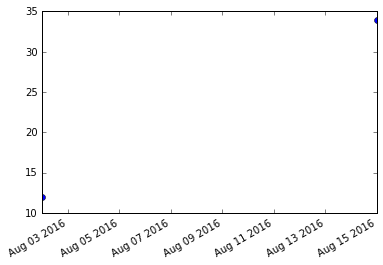

In [7]:
%matplotlib inline
import datetime
import numpy as np
import matplotlib.pylab as plt
from matplotlib.dates import DateFormatter

date1 = datetime.datetime(2016, 8, 2)
date2 = datetime.datetime(2016, 8, 15)
xL =[]
xL.append(date1)
xL.append(date2)
yL=[12.,34]
print(type(xL))
fig, ax = plt.subplots()
ax.plot_date(xL,yL)

ax.fmt_xdata = DateFormatter('%Y-%m-%d %H')
fig.autofmt_xdate()


##  put all together
1) setup credentials
2) define # of months back
3) find list of file names for the date range
4) loop over files, append date & value to 2 lists
5) plot

processing month 2  fileSet= /usr/common/nsg/sge/ge-8.1.2/default/common/accounting.6_2u2_1.2016.01.*
got file list len= 31
processing month 2  fileSet= /usr/common/nsg/sge/ge-8.1.2/default/common/accounting.6_2u2_1.2016.02.*
got file list len= 29
processing month 2  fileSet= /usr/common/nsg/sge/ge-8.1.2/default/common/accounting.6_2u2_1.2016.03.*
got file list len= 31
processing month 2  fileSet= /usr/common/nsg/sge/ge-8.1.2/default/common/accounting.6_2u2_1.2016.04.*
got file list len= 30
processing month 2  fileSet= /usr/common/nsg/sge/ge-8.1.2/default/common/accounting.6_2u2_1.2016.05.*
got file list len= 31
processing month 2  fileSet= /usr/common/nsg/sge/ge-8.1.2/default/common/accounting.6_2u2_1.2016.06.*
got file list len= 30
processing month 2  fileSet= /usr/common/nsg/sge/ge-8.1.2/default/common/accounting.6_2u2_1.2016.07.*
got file list len= 31
processing month 2  fileSet= /usr/common/nsg/sge/ge-8.1.2/default/common/accounting.6_2u2_1.2016.08.*
got file list len= 24
num file

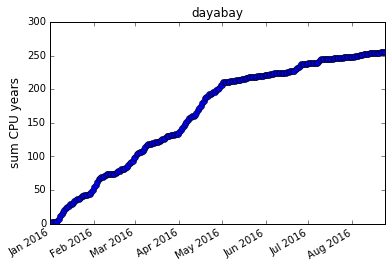

In [59]:
#1 setup
creds='-i ~/.ssh/pdsf-nim.pem -o UserKnownHostsFile=/dev/null -o StrictHostKeyChecking=no'
basen='/usr/common/nsg/sge/ge-8.1.2/default/common/accounting.6_2u2_1.'
year=2016
prjName='dayabay'

monthFList=[]
for kMonth in range(1,9):
    fileSet='%s%d.%02d.*'%(basen,year,kMonth)
    print("processing month",iMonth,' fileSet=',fileSet)
    monthFList+=getMonthFileList(fileSet)
   
print('num files=',len(monthFList)," scanning files ....")

# 3 loop over days
xL =[]
yL=[]
np=0
sumCpuDay=0
for dayF in monthFList:
    np+=1
    dayStr=dayF[-19:]
    #print(dayF,dayStr) 
    #print(dayStr[:-15],dayStr[-14:-12],dayStr[-11:-9] )
    date1 = datetime.datetime(int(dayStr[:-15]),int(dayStr[-14:-12]),int(dayStr[-11:-9]) )
    yval=getDayData(dayF,prjName)
    sumCpuDay+=float(yval)/3600./24./365
    #print('yval=',yval)
    xL.append(date1)
    yL.append(sumCpuDay)
    if np%50==1:
        print(np,date1,sumCpuDay)
    
    
fig, ax = plt.subplots()
ax.plot_date(xL,yL)

ax.fmt_xdata = DateFormatter('%Y-%m-%d %H')
fig.autofmt_xdate()

ax.set_ylabel('sum CPU years', fontsize=12)
ax.set_title(prjName, fontsize=12)


datetime.datetime(2016, 5, 2, 0, 0)

scan for strage entries

In [54]:
j=0
for x in xL:
    if float(yL[j])>1e7:
        print(j,x,yL[j])
    j+=1


13 2016-05-14 00:00:00 35972489
31 2016-06-01 00:00:00 12717326
32 2016-06-02 00:00:00 10133523
39 2016-06-09 00:00:00 10762297
